In [42]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
import math
from math import sqrt
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
# Load the train data and split into labels and features
train_data = pd.read_csv('data_science_challenge/data_science_challenge/train.csv', header=None, names=['col1', 'col2', 'col3', 'col4', 'col5', 'col6'])

# Load the test data
test_data = pd.read_csv('data_science_challenge/data_science_challenge/test.csv', header=None, names=['col1', 'col2', 'col3', 'col4', 'col5'])

In [3]:
train_data

,col1,col2,col3,col4,col5,col6
0,2021-09-22T01:21:14,lakewood,3.52,0.03,2.32,0
1,2021-09-08T19:20:58,lake forest,0.99,3.65,5.06,0
2,2021-09-11T07:26:15,west covina,6.39,6.40,5.77,0
3,2021-09-17T23:35:31,concord,4.03,3.23,0.06,0
4,2021-09-27T19:00:13,baton rouge,0.25,1.38,5.69,1
...,...,...,...,...,...,...
999995,2021-09-13T17:25:28,ogden,1.73,6.27,4.70,0
999996,2021-09-09T04:01:07,new bedford,2.97,4.11,0.02,1
999997,2021-09-11T17:01:57,stockton,5.71,5.07,4.97,0
999998,2021-09-19T04:25:32,durham,1.14,6.09,0.88,1


In [4]:
test_data

,col1,col2,col3,col4,col5
0,2021-09-17T06:53:33,aurora,2.30,3.77,1.21
1,2021-09-02T22:07:26,ontario,4.37,0.61,4.57
2,2021-09-19T18:35:18,kennewick,1.44,4.68,4.51
3,2021-09-05T05:54:11,chino,3.39,0.20,6.06
4,2021-09-22T14:51:13,bloomington,2.89,4.22,1.90
...,...,...,...,...,...
995,2021-09-13T19:30:52,pharr,2.60,6.03,5.32
996,2021-09-17T16:16:14,carrollton,1.30,0.51,6.81
997,2021-09-05T18:28:59,carson,1.71,3.49,2.63
998,2021-09-13T02:44:06,hialeah,6.92,4.36,4.61


# EDA

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   col1    1000000 non-null  object 
 1   col2    1000000 non-null  object 
 2   col3    1000000 non-null  float64
 3   col4    1000000 non-null  float64
 4   col5    1000000 non-null  float64
 5   col6    1000000 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 45.8+ MB


C:\Apps\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='col6', ylabel='count'>

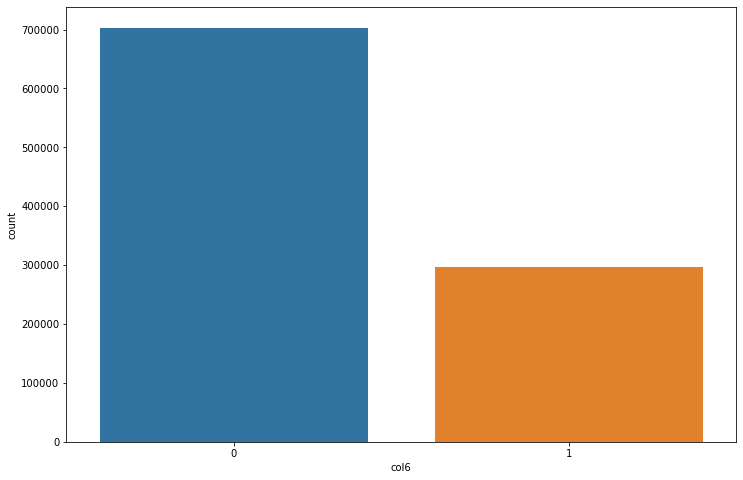

In [6]:
plt.figure(figsize=(12,8))
sns.countplot(train_data['col6'])

In [31]:
one_hot = pd.get_dummies(train_data['col2'])

new_train_data = pd.concat([train_data, one_hot], axis=1)

new_train_data.drop('col1', axis=1, inplace=True)
new_train_data.drop('col2', axis=1, inplace=True)

In [32]:
new_train_data

,col3,col4,col5,col6,abilene,akron,alameda,albany,albuquerque,alexandria,...,wichita,wichita falls,wilmington,worcester,wyoming,yakima,yonkers,yorba linda,yuba city,yuma
0,3.52,0.03,2.32,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.99,3.65,5.06,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.39,6.40,5.77,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.03,3.23,0.06,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.25,1.38,5.69,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1.73,6.27,4.70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999996,2.97,4.11,0.02,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999997,5.71,5.07,4.97,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999998,1.14,6.09,0.88,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
scaler = StandardScaler()
one_hot_df = pd.DataFrame(scaler.fit_transform(new_train_data.iloc[:, 4:]))
#one_hot_df
mean_df = pd.DataFrame(one_hot_df.mean(axis=1), columns=['mean_feature'])
mean_df
new_train_data = pd.concat([new_train_data.iloc[:, 0:4], mean_df], axis=1)
#new_train_data.iloc[:, 3] = scaler.fit_transform(new_train_data.iloc[:, 4:])

In [34]:
new_train_data

,col3,col4,col5,col6,mean_feature
0,3.52,0.03,2.32,0,0.000587
1,0.99,3.65,5.06,0,0.000465
2,6.39,6.40,5.77,0,0.001017
3,4.03,3.23,0.06,0,-0.012115
4,0.25,1.38,5.69,1,0.002421
...,...,...,...,...,...
999995,1.73,6.27,4.70,0,0.001531
999996,2.97,4.11,0.02,1,0.002210
999997,5.71,5.07,4.97,0,0.000937
999998,1.14,6.09,0.88,1,0.002598


In [35]:
train_labels = new_train_data.iloc[:, 3]
train_features1 = new_train_data.loc[:, ['col3', 'col4', 'col5']]
train_features2 = new_train_data.iloc[:, -1]
train_features = pd.concat([train_features1, train_features2], axis=1)

In [15]:
train_labels = new_train_data.iloc[:, 3]
train_features1 = new_train_data.loc[:, ['col3', 'col4', 'col5']]
train_features2 = new_train_data.iloc[:, 4:]
train_features = pd.concat([train_features1, train_features2], axis=1)

In [36]:
train_features

,col3,col4,col5,mean_feature
0,3.52,0.03,2.32,0.000587
1,0.99,3.65,5.06,0.000465
2,6.39,6.40,5.77,0.001017
3,4.03,3.23,0.06,-0.012115
4,0.25,1.38,5.69,0.002421
...,...,...,...,...
999995,1.73,6.27,4.70,0.001531
999996,2.97,4.11,0.02,0.002210
999997,5.71,5.07,4.97,0.000937
999998,1.14,6.09,0.88,0.002598


In [37]:
train_labels

0         0
1         0
2         0
3         0
4         1
         ..
999995    0
999996    1
999997    0
999998    1
999999    1
Name: col6, Length: 1000000, dtype: int64

In [7]:
# Extract the categorical columns
cols = ['col2']

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder on the training data
le.fit(train_data[cols].astype(str).values.ravel())

# Transform the categorical columns in both the training and test data
train_data['sub_col2'] = le.transform(train_data[cols].astype(str))
test_data['sub_col2'] = le.transform(test_data[cols].astype(str))

C:\Apps\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Apps\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
# Normalization
scaler = StandardScaler()
train_data['scale_sub_col2'] = scaler.fit_transform(train_data['sub_col2'].values.reshape(-1,1))
test_data['scale_sub_col2'] = scaler.fit_transform(test_data['sub_col2'].values.reshape(-1,1))

In [15]:
train_data

,col1,col2,col3,col4,col5,col6,sub_col2,scale_sub_col2
0,2021-09-22T01:21:14,lakewood,3.52,0.03,2.32,0,212,-0.183544
1,2021-09-08T19:20:58,lake forest,0.99,3.65,5.06,0,210,-0.198114
2,2021-09-11T07:26:15,west covina,6.39,6.40,5.77,0,458,1.608654
3,2021-09-17T23:35:31,concord,4.03,3.23,0.06,0,94,-1.043216
4,2021-09-27T19:00:13,baton rouge,0.25,1.38,5.69,1,30,-1.509478
...,...,...,...,...,...,...,...,...
999995,2021-09-13T17:25:28,ogden,1.73,6.27,4.70,0,301,0.464853
999996,2021-09-09T04:01:07,new bedford,2.97,4.11,0.02,1,281,0.319146
999997,2021-09-11T17:01:57,stockton,5.71,5.07,4.97,0,411,1.266242
999998,2021-09-19T04:25:32,durham,1.14,6.09,0.88,1,119,-0.861082


In [16]:
test_data

,col1,col2,col3,col4,col5,sub_col2,scale_sub_col2
0,2021-09-17T06:53:33,aurora,2.30,3.77,1.21,24,-1.558476
1,2021-09-02T22:07:26,ontario,4.37,0.61,4.57,305,0.473897
2,2021-09-19T18:35:18,kennewick,1.44,4.68,4.51,201,-0.278298
3,2021-09-05T05:54:11,chino,3.39,0.20,6.06,78,-1.167913
4,2021-09-22T14:51:13,bloomington,2.89,4.22,1.90,43,-1.421056
...,...,...,...,...,...,...,...
995,2021-09-13T19:30:52,pharr,2.60,6.03,5.32,325,0.618550
996,2021-09-17T16:16:14,carrollton,1.30,0.51,6.81,65,-1.261937
997,2021-09-05T18:28:59,carson,1.71,3.49,2.63,66,-1.254705
998,2021-09-13T02:44:06,hialeah,6.92,4.36,4.61,178,-0.444649


In [18]:
train_labels = train_data.iloc[:, -3]
train_features = train_data.loc[:, ['col3', 'col4', 'col5', 'scale_sub_col2']]

In [20]:
test_features = test_data.loc[:, ['col3', 'col4', 'col5', 'scale_sub_col2']]

In [38]:
# Split train dataset into train set and validate set 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.3, random_state=101)

# Linear Regression

In [39]:
# Train a linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Calculate RMSE
y_predictions = model.predict(X_test)
train_rmse = sqrt(mean_squared_error(y_test, y_predictions))
print('Train RMSE:', train_rmse)

Train RMSE: 0.4564656954657432


# Decision Tree  and Random Forest

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# if we try max_depth=5, min_samples_split=5:
model = DecisionTreeRegressor(max_depth=5, min_samples_split=5)
model.fit(X_train, y_train)

# Calculate RMSE
y_predictions = model.predict(X_test)
train_rmse = sqrt(mean_squared_error(y_test, y_predictions))
print('Train RMSE:', train_rmse)

Train RMSE: 0.45425428057279926


In [40]:
# find the best paramater -- Grid Search
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
}
regressor = DecisionTreeRegressor()

# Define custom scoring function to calculate RMSE
def rmse(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred))

# Create RMSE scorer
rmse_scorer = make_scorer(rmse, greater_is_better=False)

grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring=rmse_scorer)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(np.sqrt(-grid_search.best_score_)))

Best parameters: {'max_depth': 7, 'min_samples_split': 10}
Best cross-validation score: 0.67


In [41]:
# we try best parameter max_depth=7, min_samples_split=10:
model = DecisionTreeRegressor(max_depth=7, min_samples_split=10)
model.fit(X_train, y_train)

# Calculate RMSE
y_predictions = model.predict(X_test)
train_rmse = sqrt(mean_squared_error(y_test, y_predictions))
print('Train RMSE:', train_rmse)

Train RMSE: 0.4534347179952192


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# find the best paramater -- Grid Search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rfc = RandomForestRegressor()

# Define custom scoring function to calculate RMSE
def rmse(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred))

# Create RMSE scorer
rmse_scorer = make_scorer(rmse, greater_is_better=False)

grid_search = GridSearchCV(rfc, param_grid=param_grid, refit=True,verbose=2, cv=5, scoring=rmse_scorer)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(np.sqrt(-grid_search.best_score_)))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  19.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  19.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  19.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  18.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  19.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  38.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  39.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  38.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  39.0s
[CV] END max_depth=5, min_samples_leaf=1, 

# Support Vector Machines

In [ ]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)

# Calculate RMSE
y_predictions = model.predict(X_test)
train_rmse = sqrt(mean_squared_error(y_test, y_predictions))
print('Train RMSE:', train_rmse)